In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)

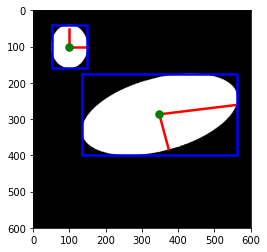

In [3]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()

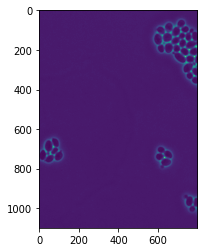

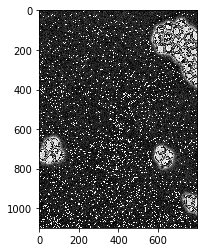

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread('/Users/Saransh/Documents/2022.03.03/Galactose/TIFs_Phase/1.tif',-1)
n = np.array(im)
plt.figure
plt.imshow(n)

n=n.astype('uint8')
fig, ax = plt.subplots()
ax.imshow(n,interpolation='nearest',cmap='gray')


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


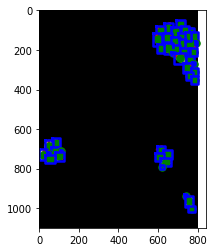

In [34]:
#test - extract cell masks from the pixel values attached during YeaZ segmentation

f = cv2.imread("/Users/Saransh/Documents/2022.03.03/Cell_Segmentations_troubleshoot/example_YeaZ_segmentation/cell_mask.tif",-1)
n = np.array(f)
x = np.unique(n)
print(np.unique(n))

label_img = label(n)
regions = regionprops(label_img)

fig, ax = plt.subplots()
ax.imshow(n, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

#ax.axis((0, 600, 600, 0))
plt.show()

In [33]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length'))
pd.DataFrame(props)


,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length
0,66.909801,714.605114,-0.962400,45.533522,39.524941
1,86.791221,652.976365,-0.203904,52.054906,43.637946
2,96.537379,735.203166,-1.325560,41.937996,34.655906
3,101.608853,613.839623,0.799533,46.845429,37.628836
4,107.594626,688.959977,-0.456684,54.068785,41.398421
5,102.718121,767.675615,-0.564053,26.984665,21.166973
6,131.301186,784.416601,0.066048,49.821806,32.474308
7,134.458440,751.914310,0.022597,46.000222,32.483479
8,129.873108,719.558789,-0.782318,35.440673,31.008875
9,137.048323,645.798749,-1.262211,47.709593,47.039793


In [36]:
#Import all packages

from nd2reader import ND2Reader
import matplotlib.pyplot as plt
from skimage import data
import napari
from skimage.data import astronaut
import cv2
import numpy as np
from tifffile import imwrite
from nd2reader import ND2Reader
import numpy as np
import glob
import csv
import os



#All the functions you need for cropping and cleaning rois from segmented cell images

from read_roi import read_roi_file
from read_roi import read_roi_zip

def extract_roi_coordinates(roizipfile):
    coordinates_list=[] #[(left,top,right,bottom)] row and column coordinates for the rectangular roi
    roi = read_roi_zip(roizipfile); #read the roi contaning zip file
    a=list(roi.items()); #extract the items (individual rois) in the roi file
    l=len(a); #find the number of ROIs in the zip file
    for i in range(0,l):
        top=a[i][1]['top']
        left=a[i][1]['left']
        bottom=a[i][1]['top']+a[i][1]['height']
        right=a[i][1]['left']+a[i][1]['width']
        coordinates_list.append([(left,top,right,bottom)])

    return coordinates_list


def crop_using_roi_tuple(coordinates_tuple,image_array):

    return image_array[coordinates_tuple[1]:coordinates_tuple[3], coordinates_tuple[0]:coordinates_tuple[2]]



import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

def cell_size_extractor(cleaned_image):
    cell_size=[];
    dummy=cleaned_image;
    dummy[dummy>0]=1;
    
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(dummy,kernel,iterations = 1)
    label_img = label(erosion)
    regions = regionprops(label_img)
    props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length','area'))
    
    for props in regions:
        
        volume=4/3*np.pi*props.major_axis_length*props.minor_axis_length*props.minor_axis_length
        cell_size.append([props.major_axis_length,props.minor_axis_length,props.area,volume])
    
    return cell_size


#to remove edge cells/half cells. algo: find intensity values of edges, create a set of those values and set those values to zero all over the image,
#since the edge values will be the values throughout the edge cells (since this is a binarized image), we will be only left with the mom and daughter cell
#of interest

import numpy as np
def clean_roi_borders(image_array):
    return_array=image_array
    shape=np.shape(image_array)
    nrows=shape[0];
    ncols=shape[1];
    left_edge=image_array[0:nrows-1,1];
    right_edge=image_array[0:nrows-1,ncols-1];
    top_edge=image_array[1,0:ncols-1];
    bottom_edge=image_array[nrows-1,0:ncols-1];
    all_edge_values=np.concatenate((left_edge,right_edge,top_edge,bottom_edge));
    unique_edge_values=np.unique(all_edge_values);
    l=len(unique_edge_values);

    for i in range(1,l): #starting from 1 to avoid zeros

        return_array[return_array==unique_edge_values[i]]=0;
    return return_array





from skimage import measure
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np


def pre_clean(image_array):
    image_array = image_array.astype('uint8') # or c.astype(np.byte)
    all_labels = measure.label(image_array)
    blobs_labels = measure.label(image_array, background=0)
    return blobs_labels

#mu=107.916
#sigma=5.832

def noisify(np_image,mu,sigma):
    img=np_image
    for x in np.nditer(img, op_flags=['readwrite']):
        if x==0:
            x[...]=round(np.random.normal(mu, sigma, 1)[0]) 
    return img


In [213]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

f = open('/Users/Saransh/Documents/2022.03.03/size_etoh.pckl', 'rb')
obj1 = pickle.load(f)
f.close()

f = open('/Users/Saransh/Documents/2022.03.03/size_raf.pckl', 'rb')
obj2 = pickle.load(f)
f.close()

f = open('/Users/Saransh/Documents/2022.03.03/size_gal.pckl', 'rb')
obj3 = pickle.load(f)
f.close()

f = open('/Users/Saransh/Documents/2022.03.03/size_glu.pckl', 'rb')
obj4 = pickle.load(f)
f.close()

f = open('/Users/Saransh/Documents/2022.03.03/size_suc.pckl', 'rb')
obj5 = pickle.load(f)
f.close()


In [214]:
print((obj5[2]))
print(np.min(obj5[2]))
print(np.max([(np.amin(obj5[2][0])),(np.amin(obj5[2][1]))]))

print((4/24)*(np.pi)*obj5[2][0][0]*obj5[2][0][1]*obj5[2][0][1])

[[40.088324698418404, 37.547319656939514], [56.31702358168199, 48.634419166264315]]
37.547319656939514
48.634419166264315
29592.00622669775


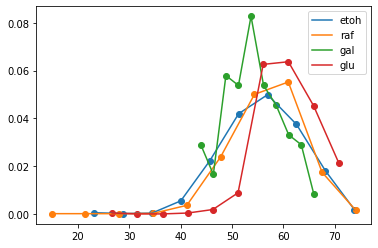

In [220]:
max_cell_1 = []
l=len(obj1)
for i in range(0,l):
    if len(obj1[i])>0:
        max_cell_1.append(float(np.amax(obj1[i])))
        
max_cell_2 = []
l=len(obj2)
for i in range(0,l):
    if len(obj2[i])>0:
        max_cell_2.append(float(np.amax(obj2[i])))
        
        
max_cell_3 = []
l=len(obj3)
for i in range(0,l):
    if len(obj3[i])>0:
        max_cell_3.append(float(np.amax(obj3[i])))        
        
max_cell_4 = []
l=len(obj4)
for i in range(0,l):
    if len(obj4[i])>0:
        max_cell_4.append(float(np.amax(obj4[i])))
        
max_cell_5 = []
l=len(obj5)
for i in range(0,l):
    if len(obj5[i])>0:
        max_cell_5.append(float(np.amax(obj5[i])))
        
hist1, bin_edges1 = np.histogram(max_cell_1, density=True)
hist2, bin_edges2 = np.histogram(max_cell_2, density=True)
hist3, bin_edges3 = np.histogram(max_cell_3[1:100], density=True)
hist4, bin_edges4 = np.histogram(max_cell_4, density=True)
hist5, bin_edges5 = np.histogram(max_cell_5, density=True)

plt.figure()
plt.scatter(bin_edges1[1:],hist1)
plt.plot(bin_edges1[1:],hist1,label='etoh')

plt.scatter(bin_edges2[1:],hist2)
plt.plot(bin_edges2[1:],hist2,label='raf')
plt.scatter(bin_edges3[1:],hist3)
plt.plot(bin_edges3[1:],hist3,label='gal')
plt.scatter(bin_edges4[1:],hist4)
plt.plot(bin_edges4[1:],hist4,label='glu')


plt.legend()
plt.show()

5.605012631197371

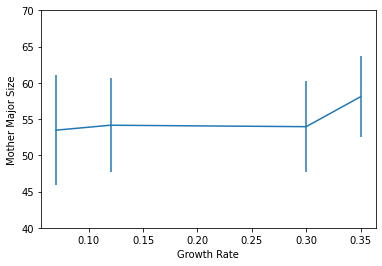

In [216]:
plt.figure()
plt.errorbar([0.07,0.12,0.3,0.35],[np.median(max_cell_1),np.median(max_cell_2),np.median(max_cell_3),np.median(max_cell_4)],yerr=[np.std(max_cell_1),np.std(max_cell_2),np.std(max_cell_3),np.std(max_cell_4)])
#plt.errorbar(x, y, xerr = 0.9)
plt.xlabel('Growth Rate')
plt.ylabel('Mother Major Size')
plt.ylim([40,70])


np.std(max_cell_4)



In [221]:
import csv
import csv
manual_set=[]
with open('/Users/Saransh/Documents/2022.03.03/Cell_Segmentations_troubleshoot/manual_gal_mother_major.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            manual_set.append(float(row[5])/2)
            line_count += 1
    print(f'Processed {line_count} lines.')

print(np.shape(max_cell_4))  
hist_man,bin_edges_man=np.histogram(manual_set, density=True)

plt.figure()
plt.scatter(np.array(bin_edges4[1:])*0.09,hist4)
plt.plot(np.array(bin_edges4[1:])*0.09,hist4,label='glu')
plt.plot(np.array(bin_edges_man[1:])*0.09,hist_man,label='manual')
plt.scatter(np.array(bin_edges_man[1:])*0.09,hist_man)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Saransh/Documents/2022.03.03/Cell_Segmentations_troubleshoot/manual_gal_mother_major.csv'

Column names are  , Area, Major, Minor, Angle, Length
Processed 101 lines.
(555,)


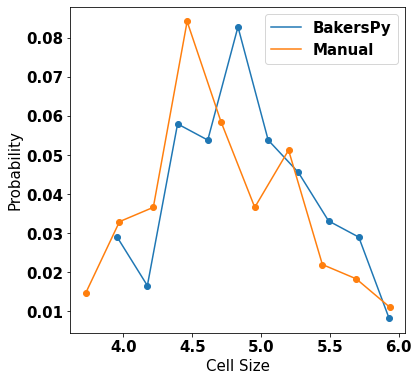

In [252]:

import csv
import csv
import matplotlib


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)




manual_set=[]
with open('/Users/Saransh/Documents/2022.03.03/Cell_Segmentations_troubleshoot/galactose_annotated_correct.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            manual_set.append(float(row[5]))
            line_count += 1
    print(f'Processed {line_count} lines.')

print(np.shape(max_cell_4))  
hist_man,bin_edges_man=np.histogram(manual_set, density=True)

f = plt.figure()
f.set_figwidth(6)
f.set_figheight(6)
plt.scatter(np.array(bin_edges3[1:])*0.09,hist3)
plt.plot(np.array(bin_edges3[1:])*0.09,hist3,label='BakersPy')
plt.plot(np.array(bin_edges_man[1:])*0.09,hist_man,label='Manual')
plt.scatter(np.array(bin_edges_man[1:])*0.09,hist_man)
plt.xlabel("Cell Size")
plt.ylabel("Probability")
plt.legend()
plt.show()

plt.figure()
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(6)
plt.scatter(np.array(manual_set)*0.09,np.array(max_cell_3[0:100])*0.09)
plt.plot(range(0,8),range(0,8))
plt.xlabel("Cell Size (Manual Annotation)")
plt.ylabel("Cell Size (BakersPy)")
plt.xlim([3,7])
plt.ylim([3,7])
plt.savefig("size_robustness.tif",dpi=300)

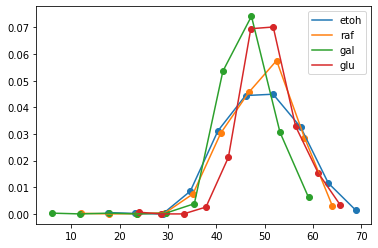

In [172]:
min_cell_1 = []
l=len(obj1)
for i in range(l):
    
    if len(obj1[i])>0:
        if len(obj1[i])==1:
            min_cell_1.append(float(np.amin(obj1[i])))
        elif len(obj1[i])==2:
            min_cell_1.append(np.max([(np.amin(obj1[i][0])),(np.amin(obj1[i][1]))]))
        
min_cell_2 = []
l=len(obj2)
for i in range(l):
    if len(obj2[i])>0:
        if len(obj2[i])==1:
            min_cell_2.append(float(np.amin(obj2[i])))
        elif len(obj2[i])==2:
            min_cell_2.append(np.max([(np.amin(obj2[i][0])),(np.amin(obj2[i][1]))]))
            
        
        
        
min_cell_3 = []
l=len(obj3)+
for i in range(l):
    if len(obj3[i])>0:
        if len(obj3[i])==1:
            min_cell_3.append(float(np.amin(obj3[i])))
        elif len(obj3[i])==2:
            min_cell_3.append(np.max([(np.amin(obj3[i][0])),(np.amin(obj3[i][1]))]))       
        
min_cell_4 = []
l=len(obj4)
for i in range(l):
    if len(obj4[i])>0:
        if len(obj4[i])==1:
            min_cell_4.append(float(np.amin(obj4[i])))
        elif len(obj1[i])==2:
            min_cell_4.append(np.max([(np.amin(obj4[i][0])),(np.amin(obj4[i][1]))]))
        
min_cell_5 = []
l=len(obj5)
for i in range(l):
    if len(obj5[i])>0:
        if len(obj5[i])==1:
            min_cell_5.append(float(np.amin(obj5[i])))
        elif len(obj5[i])==2:
            min_cell_5.append(np.max([(np.amin(obj5[i][0])),(np.amin(obj5[i][1]))]))
        
hist1, bin_edges1 = np.histogram(min_cell_1, density=True)
hist2, bin_edges2 = np.histogram(min_cell_2, density=True)
hist3, bin_edges3 = np.histogram(min_cell_3, density=True)
hist4, bin_edges4 = np.histogram(min_cell_4, density=True)
hist5, bin_edges5 = np.histogram(min_cell_5, density=True)

plt.figure()
plt.scatter(bin_edges1[1:],hist1)
plt.plot(bin_edges1[1:],hist1,label='etoh')

plt.scatter(bin_edges2[1:],hist2)
plt.plot(bin_edges2[1:],hist2,label='raf')
plt.scatter(bin_edges3[1:],hist3)
plt.plot(bin_edges3[1:],hist3,label='gal')
plt.scatter(bin_edges4[1:],hist4)
plt.plot(bin_edges4[1:],hist4,label='glu')


plt.legend()
plt.show()

Text(0, 0.5, 'Mother Minor Size')

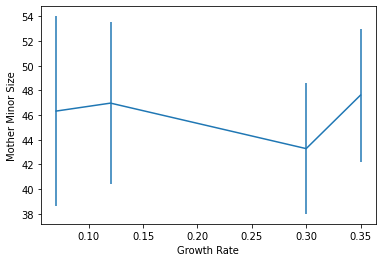

In [137]:
plt.figure()
plt.errorbar([0.07,0.12,0.3,0.35],[np.median(min_cell_1),np.median(min_cell_2),np.median(min_cell_3),np.median(min_cell_4)],yerr=[np.std(min_cell_1),np.std(min_cell_2),np.std(min_cell_3),np.std(min_cell_4)])
#plt.errorbar(x, y, xerr = 0.9)
plt.xlabel('Growth Rate')
plt.ylabel('Mother Minor Size')
#plt.ylim([40,70])

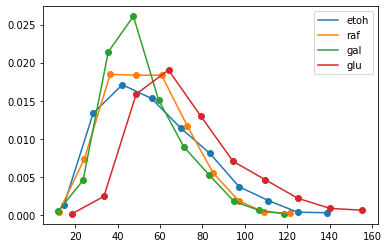

In [169]:
vol_cell_1 = []
l=len(obj1)
for i in range(0,l):
    if len(obj1[i])>0:
        if len(obj1[i])==1:
            vol_cell_1.append((4/24)*(np.pi)*obj1[i][0][0]*obj1[i][0][1]*obj1[i][0][1])
        elif len(obj1[i])==2:
            vol_cell_1.append(((4/24)*(np.pi)*obj1[i][0][0]*obj1[i][0][1]*obj1[i][0][1])+((4/24)*(np.pi*obj1[i][1][0]*obj1[i][1][1]*obj1[i][1][1])))
        
vol_cell_2 = []
l=len(obj2)
for i in range(0,l):
    if len(obj2[i])>0:
        if len(obj2[i])==1:
            vol_cell_2.append((4/24)*(np.pi)*obj2[i][0][0]*obj2[i][0][1]*obj2[i][0][1])
        elif len(obj2[i])==2:
            vol_cell_2.append(((4/24)*(np.pi)*obj2[i][0][0]*obj2[i][0][1]*obj2[i][0][1])+((4/24)*(np.pi)*obj2[i][1][0]*obj2[i][1][1]*obj2[i][1][1]))
            
        
vol_cell_3 = []
l=len(obj3)
for i in range(0,l):
    if len(obj3[i])>0:
        if len(obj3[i])==1:
            vol_cell_3.append((4/24)*(np.pi)*obj3[i][0][0]*obj3[i][0][1]*obj3[i][0][1])
        elif len(obj3[i])==2:
            vol_cell_3.append(((4/24)*(np.pi)*obj3[i][0][0]*obj3[i][0][1]*obj3[i][0][1])+((4/24)*(np.pi*obj3[i][1][0]*obj3[i][1][1]*obj3[i][1][1])))
                            
        
vol_cell_4 = []
l=len(obj4)
for i in range(0,l):
    if len(obj4[i])>0:
        if len(obj4[i])==1:
            vol_cell_4.append((4/24)*(np.pi)*obj4[i][0][0]*obj4[i][0][1]*obj4[i][0][1])
        elif len(obj4[i])==2:
            vol_cell_4.append(((4/24)*(np.pi)*obj4[i][0][0]*obj4[i][0][1]*obj4[i][0][1])+((4/24)*(np.pi)*obj4[i][1][0]*obj4[i][1][1]*obj4[i][1][1]))
        
vol_cell_5 = []
l=len(obj5)
for i in range(0,l):
    if len(obj5[i])>0:
        if len(obj5[i])==1:
            vol_cell_5.append((4/24)*(np.pi)*obj5[i][0][0]*obj5[i][0][1]*obj5[i][0][1])
        elif len(obj5[i])==2:
            vol_cell_5.append(((4/24)*(np.pi)*obj5[i][0][0]*obj5[i][0][1]*obj5[i][0][1])+((4/24)*(np.pi)*obj5[i][1][0]*obj5[i][1][1]*obj5[i][1][1]))
        
hist1, bin_edges1 = np.histogram(np.array(vol_cell_1)*0.09*0.09*0.09, density=True)
hist2, bin_edges2 = np.histogram(np.array(vol_cell_2)*0.09*0.09*0.09, density=True)
hist3, bin_edges3 = np.histogram(np.array(vol_cell_3)*0.09*0.09*0.09, density=True)
hist4, bin_edges4 = np.histogram(np.array(vol_cell_4)*0.09*0.09*0.09, density=True)
hist5, bin_edges5 = np.histogram(np.array(vol_cell_5)*0.09*0.09*0.09, density=True)

plt.figure()
plt.scatter(bin_edges1[1:],hist1)
plt.plot(bin_edges1[1:],hist1,label='etoh')

plt.scatter(bin_edges2[1:],hist2)
plt.plot(bin_edges2[1:],hist2,label='raf')
plt.scatter(bin_edges3[1:],hist3)
plt.plot(bin_edges3[1:],hist3,label='gal')
plt.scatter(bin_edges4[1:],hist4)
plt.plot(bin_edges4[1:],hist4,label='glu')


plt.legend()
plt.show()

In [249]:
print(len(vol_cell_1))

1045


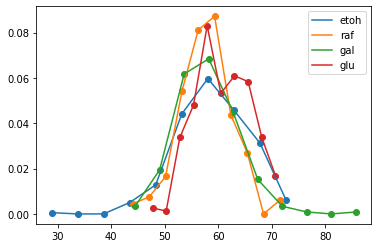

In [163]:
#Just looking at cells undergoing mitoses

max_cell_1 = []
l=len(obj1)
for i in range(0,l):
    if len(obj1[i])>1:
        max_cell_1.append(float(np.amax(obj1[i])))
        
max_cell_2 = []
l=len(obj2)
for i in range(0,l):
    if len(obj2[i])>1:
        max_cell_2.append(float(np.amax(obj2[i])))
        
        
max_cell_3 = []
l=len(obj3)
for i in range(0,l):
    if len(obj3[i])>1:
        max_cell_3.append(float(np.amax(obj3[i])))        
        
max_cell_4 = []
l=len(obj4)
for i in range(0,l):
    if len(obj4[i])>1:
        max_cell_4.append(float(np.amax(obj4[i])))
        
max_cell_5 = []
l=len(obj5)
for i in range(0,l):
    if len(obj5[i])>1:
        max_cell_5.append(float(np.amax(obj5[i])))
        
hist1, bin_edges1 = np.histogram(max_cell_1, density=True)
hist2, bin_edges2 = np.histogram(max_cell_2, density=True)
hist3, bin_edges3 = np.histogram(max_cell_3, density=True)
hist4, bin_edges4 = np.histogram(max_cell_4, density=True)
hist5, bin_edges5 = np.histogram(max_cell_5, density=True)

plt.figure()
plt.scatter(bin_edges1[1:],hist1)
plt.plot(bin_edges1[1:],hist1,label='etoh')

plt.scatter(bin_edges2[1:],hist2)
plt.plot(bin_edges2[1:],hist2,label='raf')
plt.scatter(bin_edges3[1:],hist3)
plt.plot(bin_edges3[1:],hist3,label='gal')
plt.scatter(bin_edges4[1:],hist4)
plt.plot(bin_edges4[1:],hist4,label='glu')


plt.legend()
plt.show()

(40.0, 70.0)

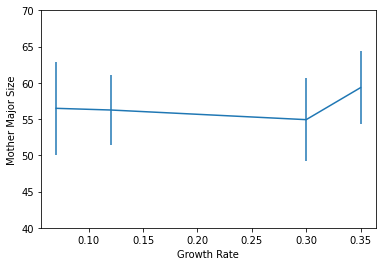

In [164]:
plt.figure()
plt.errorbar([0.07,0.12,0.3,0.35],[np.median(max_cell_1),np.median(max_cell_2),np.median(max_cell_3),np.median(max_cell_4)],yerr=[np.std(max_cell_1),np.std(max_cell_2),np.std(max_cell_3),np.std(max_cell_4)])
#plt.errorbar(x, y, xerr = 0.9)
plt.xlabel('Growth Rate')
plt.ylabel('Mother Major Size')
plt.ylim([40,70])

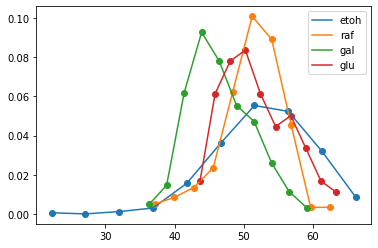

In [165]:

#only cells in mitoses

min_cell_1 = []
l=len(obj1)
for i in range(0,l):
    if len(obj1[i])>1:
        if len(obj1[i])==1:
            min_cell_1.append(float(np.amin(obj1[i])))
        elif len(obj1[i])==2:
            min_cell_1.append(np.max([(np.amin(obj1[i][0])),(np.amin(obj1[i][1]))]))
        
min_cell_2 = []
l=len(obj2)
for i in range(0,l):
    if len(obj2[i])>1:
        if len(obj2[i])==1:
            min_cell_2.append(float(np.amin(obj2[i])))
        elif len(obj2[i])==2:
            min_cell_2.append(np.max([(np.amin(obj2[i][0])),(np.amin(obj2[i][1]))]))
            
        
        
        
min_cell_3 = []
l=len(obj3)
for i in range(0,l):
    if len(obj3[i])>1:
        if len(obj3[i])==1:
            min_cell_3.append(float(np.amin(obj3[i])))
        elif len(obj3[i])==2:
            min_cell_3.append(np.max([(np.amin(obj3[i][0])),(np.amin(obj3[i][1]))]))       
        
min_cell_4 = []
l=len(obj4)
for i in range(0,l):
    if len(obj4[i])>1:
        if len(obj4[i])==1:
            min_cell_4.append(float(np.amin(obj4[i])))
        elif len(obj1[i])==2:
            min_cell_4.append(np.max([(np.amin(obj4[i][0])),(np.amin(obj4[i][1]))]))
        
min_cell_5 = []
l=len(obj5)
for i in range(0,l):
    if len(obj5[i])>1:
        if len(obj5[i])==1:
            min_cell_5.append(float(np.amin(obj5[i])))
        elif len(obj5[i])==2:
            min_cell_5.append(np.max([(np.amin(obj5[i][0])),(np.amin(obj5[i][1]))]))
        
hist1, bin_edges1 = np.histogram(min_cell_1, density=True)
hist2, bin_edges2 = np.histogram(min_cell_2, density=True)
hist3, bin_edges3 = np.histogram(min_cell_3, density=True)
hist4, bin_edges4 = np.histogram(min_cell_4, density=True)
hist5, bin_edges5 = np.histogram(min_cell_5, density=True)

plt.figure()
plt.scatter(bin_edges1[1:],hist1)
plt.plot(bin_edges1[1:],hist1,label='etoh')

plt.scatter(bin_edges2[1:],hist2)
plt.plot(bin_edges2[1:],hist2,label='raf')
plt.scatter(bin_edges3[1:],hist3)
plt.plot(bin_edges3[1:],hist3,label='gal')
plt.scatter(bin_edges4[1:],hist4)
plt.plot(bin_edges4[1:],hist4,label='glu')


plt.legend()
plt.show()

Text(0, 0.5, 'Mother Minor Size')

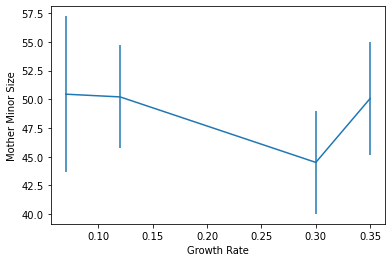

In [166]:
plt.figure()
plt.errorbar([0.07,0.12,0.3,0.35],[np.median(min_cell_1),np.median(min_cell_2),np.median(min_cell_3),np.median(min_cell_4)],yerr=[np.std(min_cell_1),np.std(min_cell_2),np.std(min_cell_3),np.std(min_cell_4)])
#plt.errorbar(x, y, xerr = 0.9)
plt.xlabel('Growth Rate')
plt.ylabel('Mother Minor Size')
#plt.ylim([40,70])

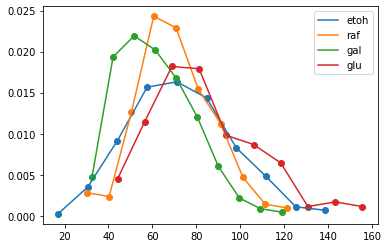

In [167]:
#only cells in mitoses

vol_cell_1 = []
l=len(obj1)
for i in range(0,l):
    if len(obj1[i])>1:
        if len(obj1[i])==1:
            vol_cell_1.append((4/24)*(np.pi)*obj1[i][0][0]*obj1[i][0][1]*obj1[i][0][1])
        elif len(obj1[i])==2:
            vol_cell_1.append(((4/24)*(np.pi)*obj1[i][0][0]*obj1[i][0][1]*obj1[i][0][1])+((4/24)*(np.pi*obj1[i][1][0]*obj1[i][1][1]*obj1[i][1][1])))
        
vol_cell_2 = []
l=len(obj2)
for i in range(0,l):
    if len(obj2[i])>1:
        if len(obj2[i])==1:
            vol_cell_2.append((4/24)*(np.pi)*obj2[i][0][0]*obj2[i][0][1]*obj2[i][0][1])
        elif len(obj2[i])==2:
            vol_cell_2.append(((4/24)*(np.pi)*obj2[i][0][0]*obj2[i][0][1]*obj2[i][0][1])+((4/24)*(np.pi)*obj2[i][1][0]*obj2[i][1][1]*obj2[i][1][1]))
            
        
vol_cell_3 = []
l=len(obj3)
for i in range(0,l):
    if len(obj3[i])>1:
        if len(obj3[i])==1:
            vol_cell_3.append((4/24)*(np.pi)*obj3[i][0][0]*obj3[i][0][1]*obj3[i][0][1])
        elif len(obj3[i])==2:
            vol_cell_3.append(((4/24)*(np.pi)*obj3[i][0][0]*obj3[i][0][1]*obj3[i][0][1])+((4/24)*(np.pi*obj3[i][1][0]*obj3[i][1][1]*obj3[i][1][1])))
                            
        
vol_cell_4 = []
l=len(obj4)
for i in range(0,l):
    if len(obj4[i])>1:
        if len(obj4[i])==1:
            vol_cell_4.append((4/24)*(np.pi)*obj4[i][0][0]*obj4[i][0][1]*obj4[i][0][1])
        elif len(obj4[i])==2:
            vol_cell_4.append(((4/24)*(np.pi)*obj4[i][0][0]*obj4[i][0][1]*obj4[i][0][1])+((4/24)*(np.pi)*obj4[i][1][0]*obj4[i][1][1]*obj4[i][1][1]))
        
vol_cell_5 = []
l=len(obj5)
for i in range(0,l):
    if len(obj5[i])>1:
        if len(obj5[i])==1:
            vol_cell_5.append((4/24)*(np.pi)*obj5[i][0][0]*obj5[i][0][1]*obj5[i][0][1])
        elif len(obj5[i])==2:
            vol_cell_5.append(((4/24)*(np.pi)*obj5[i][0][0]*obj5[i][0][1]*obj5[i][0][1])+((4/24)*(np.pi)*obj5[i][1][0]*obj5[i][1][1]*obj5[i][1][1]))
        
hist1, bin_edges1 = np.histogram(np.array(vol_cell_1)*0.09*0.09*0.09, density=True)
hist2, bin_edges2 = np.histogram(np.array(vol_cell_2)*0.09*0.09*0.09, density=True)
hist3, bin_edges3 = np.histogram(np.array(vol_cell_3)*0.09*0.09*0.09, density=True)
hist4, bin_edges4 = np.histogram(np.array(vol_cell_4)*0.09*0.09*0.09, density=True)
hist5, bin_edges5 = np.histogram(np.array(vol_cell_5)*0.09*0.09*0.09, density=True)

plt.figure()
plt.scatter(bin_edges1[1:],hist1)
plt.plot(bin_edges1[1:],hist1,label='etoh')

plt.scatter(bin_edges2[1:],hist2)
plt.plot(bin_edges2[1:],hist2,label='raf')
plt.scatter(bin_edges3[1:],hist3)
plt.plot(bin_edges3[1:],hist3,label='gal')
plt.scatter(bin_edges4[1:],hist4)
plt.plot(bin_edges4[1:],hist4,label='glu')


plt.legend()
plt.show()

Text(0, 0.5, 'Cell Volume Size')

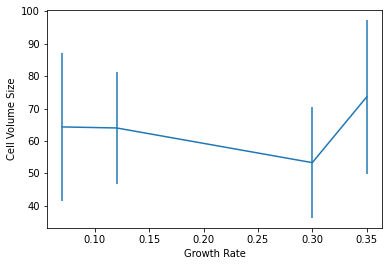

In [168]:
plt.figure()
plt.errorbar([0.07,0.12,0.3,0.35],[np.median(vol_cell_1)*0.09*0.09*0.09,np.median(vol_cell_2)*0.09*0.09*0.09,np.median(vol_cell_3)*0.09*0.09*0.09,np.median(vol_cell_4)*0.09*0.09*0.09],yerr=[np.std(vol_cell_1)*0.09*0.09*0.09,np.std(vol_cell_2)*0.09*0.09*0.09,np.std(vol_cell_3)*0.09*0.09*0.09,np.std(vol_cell_4)*0.09*0.09*0.09])
plt.xlabel('Growth Rate')
plt.ylabel('Cell Volume Size')